In [36]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns



In [37]:
# Load the IRIS dataset
iris = datasets.load_iris()

In [38]:
# Define features and targets

X, y = iris['data'], iris['target']

In [39]:
# EDA
# Shows 150 Observations and 4 features.
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [40]:
# Split train and test dataset
from sklearn.model_selection import train_test_split
# funtion will return 4 outputs, allocates 80% of data to trianing and 20% to testing
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [41]:
x_train.shape
x_test.shape
y_train.shape
y_test.shape
# Assigned 120 samples for training and 30 samples for testing

(120, 4)

(30, 4)

(120,)

(30,)

In [42]:
# import ML Algorithm(logistics regression)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [43]:
# Training the model

# fit the algorithm with the x_train and y_train dataset
lr.fit(x_train, y_train)
print("Finished")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Finished


In [44]:
# Check model params/hyper-params

lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [45]:
# Using trained model to predict the data
y_pred = lr.predict(x_test)
y_pred

array([0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 1,
       2, 0, 1, 2, 1, 2, 1, 0])

In [46]:
# Model evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average="macro")
precision = precision_score(y_test, y_pred, average="macro")
print("Accuracy: {:.2f}%".format(accuracy* 100))
print("Recall: {:.2f}%".format(recall* 100))
print("Precision: {:.2f}%".format(precision* 100))

Accuracy: 96.67%
Recall: 96.97%
Precision: 96.97%


In [48]:
# Model Persistence
import pickle
pickle.dump(lr, open('/Users/angks/Desktop/School/Year_2/Sem01/ST1511_AI_and_Machine_Learning/Models/iris_trained_model.p', 'wb'))
print("Model exported")


Model exported


In [51]:
# Load the Model

model = pickle.load(open("/Users/angks/Desktop/School/Year_2/Sem01/ST1511_AI_and_Machine_Learning/Models/iris_trained_model.p", 'rb'))


In [53]:
modelPred = model.predict(x_test)

In [55]:
# Using Confusion matrix to evaluate model
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, modelPred)
cm

array([[ 9,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 10]])

What is a Confusion Matrix?

The Digonal of the matrix shows the amount of samples predicted correctly, and any other variables outside of the diagonal will be considered as values predicted wrongly.


Text(0.5, 1, 'Model Evaluation using Confusion Matrix')

Text(0.5, 15.0, 'Estimated')

Text(33.0, 0.5, 'Actual')

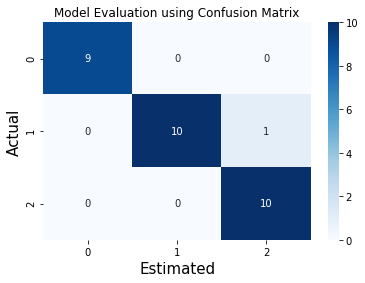

In [62]:
sns.heatmap(cm, cmap="Blues", annot=True)
plt.title("Model Evaluation using Confusion Matrix")
plt.xlabel("Estimated", fontsize=15)
plt.ylabel("Actual", fontsize=15)
plt.show()